In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


# **PRE-PROCESSING**

In [ ]:
data = pd.read_excel("online_retail_II.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
# UNIQUE CUSTOMER COUNT
data['Customer ID'].nunique()

4383

In [ ]:
# TOTAL FREQUENCY COUNT FOR STOCK_CODE
data['StockCode'].value_counts()

StockCode
85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
90005B       1
90197C       1
90080        1
20904        1
21120        1
Name: count, Length: 4632, dtype: int64

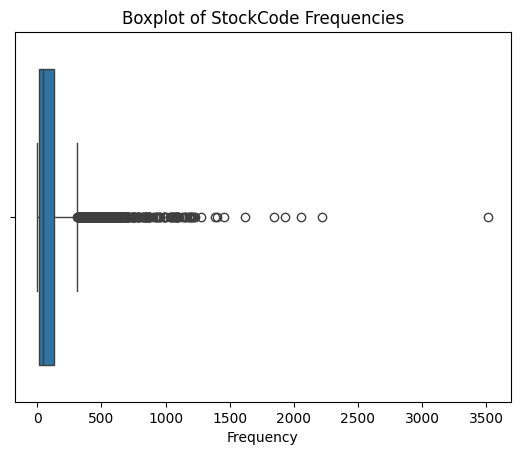

In [ ]:
# BOX PLOT, FOR STOCK CODE FREQUENCIES
stock_code_counts = data['StockCode'].value_counts()

stock_code_counts = pd.DataFrame(stock_code_counts)
stock_code_counts.reset_index(inplace=True)
stock_code_counts.columns = ['StockCode', 'Frequency']
sns.boxplot(x='Frequency', data=stock_code_counts)
plt.title('Boxplot of StockCode Frequencies')
plt.show()

The dataset contains records for 4,276 unique stocks. However, most of these stocks appear less than 500 times within the dataset. To optimize the dataset for model training and ensure that there is a sufficient number of instances for each stock to facilitate accurate predictions, it is proposed to filter the dataset. Specifically, only stocks that appear between 100 and 2,000 times will be retained. This filtering strategy will help in focusing the model training on stocks that have enough data points to establish meaningful patterns without being overwhelmed by those that have too few or excessively many instances, thus potentially enhancing the overall predictive performance of the model.

In [ ]:
# Dropping columns
data = data.drop(columns=['Invoice','Description','Customer ID'],axis=1)

In [ ]:
stock_code_counts = data['StockCode'].value_counts()

In [ ]:
# Filtering the data with frequency of stock code is set between 100 and 2000
frequent_stocks = stock_code_counts[(stock_code_counts >= 100) & (stock_code_counts <= 2000)].index.tolist()
data_1 = data[data['StockCode'].isin(frequent_stocks)]

In [ ]:
data_1

,StockCode,Quantity,InvoiceDate,Price,Country
0,85048,12,2009-12-01 07:45:00,6.95,United Kingdom
1,79323P,12,2009-12-01 07:45:00,6.75,United Kingdom
2,79323W,12,2009-12-01 07:45:00,6.75,United Kingdom
3,22041,48,2009-12-01 07:45:00,2.10,United Kingdom
4,21232,24,2009-12-01 07:45:00,1.25,United Kingdom
...,...,...,...,...,...
525456,22271,2,2010-12-09 20:01:00,2.95,United Kingdom
525457,22750,1,2010-12-09 20:01:00,3.75,United Kingdom
525458,22751,1,2010-12-09 20:01:00,3.75,United Kingdom
525459,20970,2,2010-12-09 20:01:00,3.75,United Kingdom


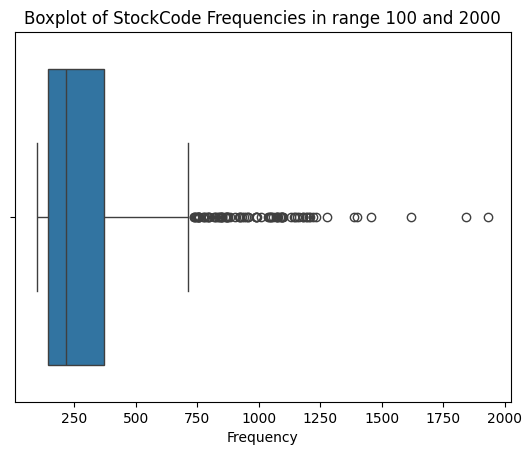

In [ ]:
stock_code_counts_2 = data_1['StockCode'].value_counts()

stock_code_counts = pd.DataFrame(stock_code_counts_2)
stock_code_counts.reset_index(inplace=True)
stock_code_counts.columns = ['StockCode', 'Frequency']
sns.boxplot(x='Frequency', data=stock_code_counts)
plt.title('Boxplot of StockCode Frequencies in range 100 and 2000')
plt.show()

In [ ]:
# Feature extracting the InvoiceDate column into day, month, year and day of the week
data_1['Year'] = data_1['InvoiceDate'].dt.year
data_1['Month'] = data_1['InvoiceDate'].dt.month
data_1['Day'] = data_1['InvoiceDate'].dt.day
data_1['Weekday'] = data_1['InvoiceDate'].dt.weekday

<ipython-input-30-1df13b77cafa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Year'] = data_1['InvoiceDate'].dt.year
<ipython-input-30-1df13b77cafa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Month'] = data_1['InvoiceDate'].dt.month
<ipython-input-30-1df13b77cafa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
data_1.head()

,StockCode,Quantity,InvoiceDate,Price,Country,Year,Month,Day,Weekday
0,85048,12,2009-12-01 07:45:00,6.95,United Kingdom,2009,12,1,1
1,79323P,12,2009-12-01 07:45:00,6.75,United Kingdom,2009,12,1,1
2,79323W,12,2009-12-01 07:45:00,6.75,United Kingdom,2009,12,1,1
3,22041,48,2009-12-01 07:45:00,2.10,United Kingdom,2009,12,1,1
4,21232,24,2009-12-01 07:45:00,1.25,United Kingdom,2009,12,1,1


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428703 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    428703 non-null  object        
 1   Quantity     428703 non-null  int64         
 2   InvoiceDate  428703 non-null  datetime64[ns]
 3   Price        428703 non-null  float64       
 4   Country      428703 non-null  object        
 5   Year         428703 non-null  int32         
 6   Month        428703 non-null  int32         
 7   Day          428703 non-null  int32         
 8   Weekday      428703 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(2)
memory usage: 26.2+ MB


In [ ]:
# converting the stockcode to str for further encoding into numerical values
data_1['StockCode'] = data_1['StockCode'].astype(str)

<ipython-input-33-364ea47ad5ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['StockCode'] = data_1['StockCode'].astype(str)


In [ ]:
# Label encoding the stockcode and country variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_1['StockCode'] = le.fit_transform(data_1['StockCode'])
data_1['Country']=le.fit_transform(data_1['Country'])

<ipython-input-34-35a93779e9aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['StockCode'] = le.fit_transform(data_1['StockCode'])
<ipython-input-34-35a93779e9aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Country']=le.fit_transform(data_1['Country'])


In [ ]:
# Dropping invoicedate column as features are extracted from it
data_1 = data_1.drop(columns=['InvoiceDate'], axis=1)

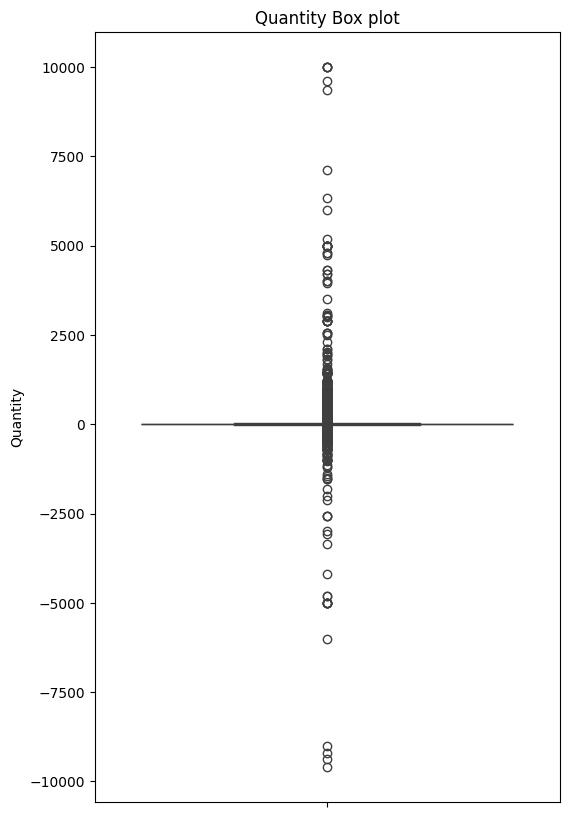

In [ ]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=data_1['Quantity'])
plt.title('Quantity Box plot')
plt.show()

The box plot representing the 'Quantity' variable in the dataset indicates the presence of negative values. Given the nature of the 'Quantity' variable, which logically cannot be negative, these values likely arise from errors in the data collection process. To address this issue, there are two possible remediation strategies:


*   converting negative values to positive
*   restricting the variable to positive only



In [ ]:
data_1['Quantity'].min()

-9600

In [ ]:
data_1['Quantity'].describe()

count    428703.000000
mean         10.260892
std          76.268284
min       -9600.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       10000.000000
Name: Quantity, dtype: float64

In [ ]:
# Filtering the dataset w.r.t Quantity, and restricting the range of values between 0 and 4000
data_2 = data_1.loc[(data_1['Quantity']>0) & (data_1['Quantity']<4000)]

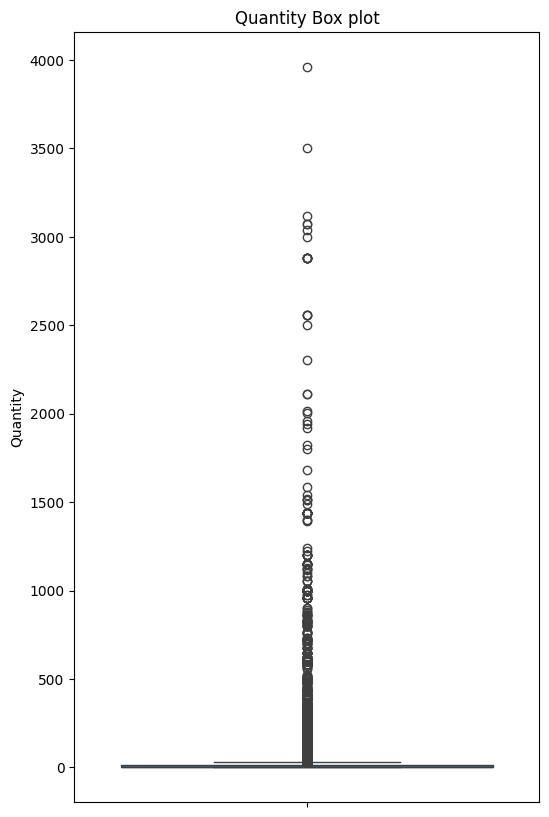

In [ ]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=data_2['Quantity'])
plt.title('Quantity Box plot')
plt.show()

In [ ]:
X = data_2.drop(columns=['Quantity'],axis=1)
y = data_2['Quantity']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420150 entries, 0 to 525460
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StockCode  420150 non-null  int64  
 1   Price      420150 non-null  float64
 2   Country    420150 non-null  int64  
 3   Year       420150 non-null  int32  
 4   Month      420150 non-null  int32  
 5   Day        420150 non-null  int32  
 6   Weekday    420150 non-null  int32  
dtypes: float64(1), int32(4), int64(2)
memory usage: 19.2 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

# LINEAR REGRESSION

In [ ]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.001)
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 115178955653648903185562075136.00
Mean Absolute Error: 316590442636005.31
R-squared: -64886728720676946163269632.00


# DECISION TREE

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    random_state=42)

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1452.83
Mean Absolute Error: 6.91
R-squared: 0.18


# RANDOM FOREST

In [ ]:
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [ ]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1452.83
Mean Absolute Error: 6.91
R-squared: 0.18


# KNN REGRESSOR

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=30)

In [ ]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [ ]:
y_pred = knn_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1680.03
Mean Absolute Error: 10.06
R-squared: 0.05
